<a href="https://colab.research.google.com/github/arifuddinatif/Quantitative-Analysis-and-Modeling-for-S-P-500/blob/main/S%26P_500_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import datetime as dt


In [171]:
#col_names = ['Date','Open','High','Low','Close','Volume','Name']
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/S&P 500/cs-1 data set.csv')

In [53]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619040 non-null  float64
 2   high    619040 non-null  float64
 3   low     619040 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [212]:
df.describe() 

,open,high,low,close,volume
count,619040.000000,619040.000000,619040.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.377904,98.206884,96.506797,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.535375,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [33]:
df.isnull().sum()

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

In [172]:
df['open'] = df['open'].fillna(df['open'].mean())
df['high'] = df['high'].fillna(df['high'].mean())
df['low'] = df['low'].fillna(df['low'].mean())

In [106]:
type(df['date'][0])

str

In [173]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df['Name'].unique()

In [162]:
df['Log returns'] = np.log(df['close']/df['close'].shift())

In [92]:
df.head()

,date,open,high,low,close,volume,Name,Log returns
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,NaN
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,-0.019857
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,-0.013227
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,0.026963
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,-0.046780


# AAL stock weekly volatility

In [108]:
ticker_AAL = df[df['Name'] == 'AAL']

In [115]:
ticker_AAL.head(7)

,date,open,high,low,close,volume,Name,Log returns
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,NaN
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,-0.019857
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,-0.013227
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,0.026963
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,-0.046780
5,2013-02-15,13.93,14.61,13.93,14.50,15628000,AAL,0.035806
6,2013-02-19,14.33,14.56,14.08,14.26,11354400,AAL,-0.016690


In [110]:
ticker_AAL['Log returns'] = np.log(ticker_AAL['close']/ticker_AAL['close'].shift())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [112]:
volatility_AAL = ticker_AAL['Log returns'].std()*5**0.5

In [113]:
volatility_AAL

0.050295801856131556

Text(0.5, 1.0, 'AAL volatility: 5.0 %')

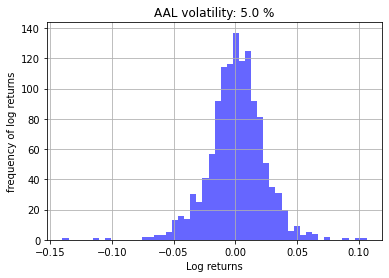

In [119]:
str_vol = round(volatility_AAL, 3)*100

fig, ax = plt.subplots()
ticker_AAL['Log returns'].hist(ax=ax, bins=50, alpha=0.6, color='b')
ax.set_xlabel('Log returns')
ax.set_ylabel('frequency of log returns')
ax.set_title(f'AAL volatility: {str_vol} %')

#AAPL stock weekly volatility

In [120]:
ticker_AAPL = df[df['Name'] == 'AAPL']

In [166]:
ticker_AAPL.tail(7)

,date,open,high,low,close,volume,Name,Log returns
2511,2018-01-30,165.525,167.3700,164.7000,166.97,46048185,AAPL,-0.005912
2512,2018-01-31,166.870,168.4417,166.5000,167.43,32478930,AAPL,0.002751
2513,2018-02-01,167.165,168.6200,166.7600,167.78,47230787,AAPL,0.002088
2514,2018-02-02,166.000,166.8000,160.1000,160.50,86593825,AAPL,-0.044360
2515,2018-02-05,159.100,163.8800,156.0000,156.49,72738522,AAPL,-0.025302
2516,2018-02-06,154.830,163.7200,154.0000,163.03,68243838,AAPL,0.040942
2517,2018-02-07,163.085,163.4000,159.0685,159.54,51608580,AAPL,-0.021640


In [122]:
ticker_AAPL['Log returns'] = np.log(ticker_AAPL['close']/ticker_AAPL['close'].shift())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [167]:
volatility_AAPL = ticker_AAPL['Log returns'].std()*5**0.5

In [168]:
volatility_AAPL

0.03262317205793467

Text(0.5, 1.0, 'AAPL volatility: 3.3000000000000003 %')

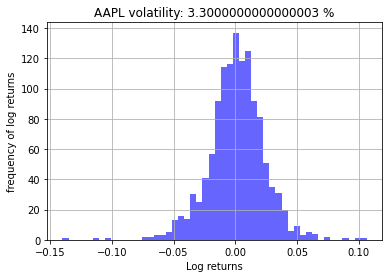

In [169]:
str_vol = round(volatility_AAPL, 3)*100

fig, ax = plt.subplots()
ticker_AAL['Log returns'].hist(ax=ax, bins=50, alpha=0.6, color='b')
ax.set_xlabel('Log returns')
ax.set_ylabel('frequency of log returns')
ax.set_title(f'AAPL volatility: {str_vol} %')

#Function to calculate weekly volatility

In [254]:
def weekly_volatility(stock_ticker,start_date,end_date):

  stock_df = df[(df['Name'] == stock_ticker) & (df['date'].between(start_date,end_date))]
  stock_df['Log returns'] = np.log(stock_df['close']/stock_df['close'].shift())
  volatility = stock_df['Log returns'].std()*5**0.5
  volatility = round(volatility, 3)*100
  return volatility

In [ ]:
weekly_volatility('AAPL','2013-02-08','2018-02-07')

In [242]:
all_tickers = list(df['Name'].unique())

In [255]:
tickers_df = pd.DataFrame(all_tickers) 

In [256]:
tickers_df.rename(columns = {0:'stock name'},inplace = True)

In [ ]:
tickers_df

In [ ]:
all_volatilities = []
for i in all_tickers:
  all_volatilities.append(weekly_volatility(i,'2013-02-08','2018-02-07'))

In [ ]:
all_volatilities

In [259]:
tickers_df['volatility'] = all_volatilities

In [261]:
tickers_df.sort_values('volatility',ascending = False,inplace=True)

In [263]:
tickers_df.reset_index(inplace=True)

In [265]:
tickers_df.drop(columns = ['index'],axis=1,inplace = True)

In [252]:
tickers_df.head(10)

,stock name,volatility
0,CHK,9.3
1,BHGE,9.1
2,AMD,8.3
3,FCX,7.6
4,EVHC,7.1
5,WMB,6.7
6,NI,6.7
7,UA,6.7
8,INCY,6.6
9,MRO,6.6


In [253]:
tickers_df.tail(10)

,stock name,volatility
495,CB,2.1
496,AJG,2.1
497,BRK.B,2.1
498,MCD,2.1
499,PG,2.0
500,JNJ,2.0
501,RSG,2.0
502,KO,2.0
503,WM,2.0
504,PEP,1.9
